Konten:
1. Business Problem Understanding
2. Data Understanding
3. Data Preparation
4. Modelling
5. Conclusion
6. Recommendation

## Business Problem Understanding
1. Latar Belakang

Capital Bikeshare adalah sebuah perusahaan penyedia jasa penyewaan sepeda yang berbasis di Ibukota AS, Washington DC. Saat ini, Capital Bikeshare memiliki ketersediaan 5000 sepeda dan lebih dari 700 stasiun penyewaan yang tersebar di 7 wilayah. Penyewaan sepeda ini tidak hanya ditujukkan untuk penggunaan sehari-hari melainkan juga untuk wisatawan asing maupun lokal yang ingin menikmati pengalaman menjelajah Washington DC dengan mudah dan harga yang terjangkau.

2. Pernyataan Masalah

Penggunaan sepeda sebagai media transportasi harus mempertimbangkan kenyamanan dan keamanan saat berkendara. Salah satu pertimbangan tersebut adalah faktor cuaca. Faktor cuaca ini yang kemudian dapat menjadi salah satu faktor yang mempengaruhi minat seseorang dalam berkendara. Oleh karena itu, perusahaan ingin mengetahui faktor apa saja yang dapat mempengaruhi permintaan penyewaan sepeda.

3. Tujuan

Berdasarkan pernyataan masalah tersebut, Capital Bikeshare perlu untuk memiliki sistem yang dapat memperkirakan jumlah permintaan penyewa sepeda kedepannya.

4. Analytic Approach

Yang perlu kita lakukan adalah menganalisa pola-pola penggunaan sepeda pada setiap musim berdasarkan data yang ada. Kemudian kita akan membuat model regresi yang dapat membantu perusahaan untuk dapat memprediksi jumlah permintaan penyewaan sepeda.

5. Metric Evaluation

Ada tiga metode evaluasi metrik yang akan digunakan. Pertama, MAPE. MAPE mengukur rata-rata persentase selisih absolut antara nilai prediksi dan nilai asli. Semakin rendah nilai MAPE, semakin baik kinerja model regresi tersebut. Kedua, MAE. MAE mengukur rata-rata dari selisih absolut antara nilai prediksi dan nilai asli. Sama dengan MAPE, semakin rendah nilai MAE, semakin baik kinerja model regresi tersebut. Terakhir, RMSE. RMSE mengukur akar kuadrat rata-rata dari selisih kuadrat antara nilai prediksi dan nilai asli. RMSE memberikan gambaran tentang seberapa baik model dalam memprediksi dengan mempertimbangkan perbedaan antara nilai prediksi dan nilai asli. Semakin mendekati 1 nilai dari RMSE, semakin baik kinerja model regresi tersebut.

## Data Understanding

Dataset yang digunakan adalah data penggunaan sepeda Capital Bikeshare sepanjang tahun 2011 hingga 2012.




### Atribut data

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| dteday | Object | Tanggal Penyewaan |
| hum | Float | Kelembaban Udara |
| weathersit | Int | Kondisi Cuaca (1-4) |
| holiday | Int | Hari Libur (0-1) |
| season | Int | Musim (1-4) |
| atemp | Float | Feeling Temprature |
| temp | Float | Temprature |
| hr | Int | Jam Penyewaan |
| casual | Int | Jumlah Pengguna Umum |
| registered | Int | Jumlah Pengguna Terdaftar |
| cnt | Int | Total Jumlah Pengguna |

Penjelasan Numerik:
1. weathersit :
  1. Cerah, cerah berawan
  2. Berkabut, mendung
  3. Sedikit bersalju, gerimis
  4. Hujan besar, hujan + petir, bersalju + berkabut

2. holiday :
  0. Bukan hari libur
  1. Hari libur

3. season :
  1. Winter
  2. Spring
  3. Summer
  4. Fall

In [135]:
#library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#dataset
df = pd.read_csv('data_bike_sharing.csv')
df

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857
...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,0.75,1,0,1,0.2273,0.24,7,14,243,257
12161,2012-07-06,0.62,1,0,3,0.7424,0.78,0,39,63,102
12162,2012-02-20,0.60,2,1,1,0.2121,0.24,5,0,6,6
12163,2012-03-31,0.77,2,0,2,0.4242,0.42,2,14,55,69


### Data Secara Umum

In [136]:
#informasi dalam dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


In [137]:
#informasi statistik dalam dataset
df.describe()

,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,0.625451,1.416934,0.029758,2.488615,0.476996,0.498185,11.519770,35.834443,153.436580,189.271023
std,0.192102,0.635937,0.169925,1.106157,0.171857,0.192492,6.931872,49.489286,151.046123,181.223903
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,0.470000,1.000000,0.000000,2.000000,0.333300,0.340000,6.000000,4.000000,34.000000,40.000000
50%,0.620000,1.000000,0.000000,2.000000,0.484800,0.500000,12.000000,17.000000,115.000000,142.000000
75%,0.780000,2.000000,0.000000,3.000000,0.621200,0.660000,18.000000,49.000000,220.000000,282.000000
max,1.000000,4.000000,1.000000,4.000000,1.000000,1.000000,23.000000,362.000000,876.000000,970.000000


In [138]:
#unique value dari setiap kolom
pd.set_option('display.max_colwidth', -1)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tableunique = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tableunique

<ipython-input-138-df1f1b986c81>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,Column Name,Number of Unique,Unique Sample
0,dteday,731,"[2011-12-09, 2012-06-17, 2011-06-15, 2012-03-31, 2012-07-31, 2012-10-01, 2012-08-28, 2012-01-01, 2011-10-13, 2012-06-09, 2011-06-28, 2011-12-21, 2012-01-31, 2012-02-07, 2012-05-15, 2011-01-04, 2012-02-27, 2012-08-21, 2011-02-13, 2012-07-09, 2012-12-18, 2011-06-07, 2012-09-26, 2012-08-20, 2011-02-17, 2012-05-08, 2012-06-26, 2011-09-02, 2011-03-29, 2012-06-16, 2011-09-17, 2011-07-10, 2011-02-02, 2012-09-23, 2011-02-25, 2011-03-12, 2011-05-09, 2012-08-26, 2011-03-31, 2012-03-22, 2012-08-24, 2012-05-31, 2012-09-08, 2011-06-25, 2011-10-09, 2011-05-05, 2012-05-14, 2012-07-22, 2011-04-02, 2012-02-04, 2012-10-22, 2012-02-23, 2012-03-08, 2011-07-23, 2012-01-17, 2012-06-22, 2012-10-06, 2012-10-15, 2011-04-07, 2012-01-03, 2011-07-18, 2011-10-19, 2011-12-26, 2011-08-10, 2011-11-07, 2012-12-17, 2012-03-02, 2011-02-26, 2011-08-22, 2011-03-02, 2012-01-28, 2011-10-16, 2011-12-02, 2012-02-18, 2012-11-16, 2011-11-06, 2012-05-18, 2011-04-22, 2011-01-30, 2011-08-06, 2011-07-30, 2011-01-28, 2011-02-18, 2011-04-15, 2011-11-30, 2012-01-26, 2012-06-04, 2011-11-24, 2012-11-27, 2011-01-22, 2012-04-02, 2012-07-15, 2011-03-23, 2011-12-31, 2011-03-09, 2012-01-11, 2011-02-24, 2011-01-29, 2012-01-08, 2012-04-05, ...]"
1,hum,89,"[0.62, 0.64, 0.53, 0.87, 0.55, 0.72, 0.54, 0.93, 1.0, 0.24, 0.78, 0.6, 0.38, 0.52, 0.8, 0.37, 0.3, 0.83, 0.94, 0.61, 0.73, 0.35, 0.41, 0.74, 0.49, 0.33, 0.44, 0.77, 0.89, 0.88, 0.66, 0.7, 0.71, 0.63, 0.57, 0.43, 0.39, 0.45, 0.48, 0.5, 0.34, 0.19, 0.36, 0.65, 0.81, 0.79, 0.27, 0.29, 0.67, 0.75, 0.76, 0.31, 0.4, 0.28, 0.69, 0.08, 0.32, 0.51, 0.46, 0.59, 0.58, 0.23, 0.84, 0.82, 0.47, 0.18, 0.25, 0.42, 0.86, 0.0, 0.68, 0.56, 0.16, 0.21, 0.97, 0.85, 0.26, 0.22, 0.2, 0.17, 0.1, 0.15, 0.13, 0.9, 0.92, 0.96, 0.91, 0.12, 0.14]"
2,weathersit,4,"[1, 2, 3, 4]"
3,holiday,2,"[0, 1]"
4,season,4,"[4, 2, 3, 1]"
5,atemp,65,"[0.3485, 0.5152, 0.6212, 0.697, 0.4545, 0.6515, 0.2727, 0.6061, 0.4394, 0.2576, 0.5455, 0.2273, 0.6667, 0.4091, 0.3939, 0.6364, 0.5303, 0.5, 0.3636, 0.7424, 0.3333, 0.4242, 0.5758, 0.4697, 0.5909, 0.7576, 0.6818, 0.303, 0.7727, 0.1212, 0.803, 0.3182, 0.2121, 0.7879, 0.197, 0.1515, 0.4848, 0.1818, 0.3788, 0.0909, 0.2879, 0.2424, 0.5606, 0.1667, 0.7121, 0.7273, 0.0303, 0.8333, 0.8636, 0.8788, 0.1364, 0.1061, 0.8485, 0.8182, 0.0455, 0.8939, 0.9242, 0.0152, 0.0758, 0.0606, 0.9545, 0.9091, 0.0, 1.0, 0.9848]"
6,temp,50,"[0.36, 0.54, 0.62, 0.76, 0.46, 0.7, 0.26, 0.82, 0.66, 0.44, 0.58, 0.28, 0.22, 0.4, 0.38, 0.68, 0.56, 0.72, 0.52, 0.6, 0.34, 0.42, 0.64, 0.24, 0.48, 0.8, 0.32, 0.16, 0.74, 0.88, 0.3, 0.14, 0.9, 0.18, 0.06, 0.2, 0.5, 0.08, 0.78, 0.84, 0.04, 0.86, 0.12, 0.94, 0.1, 0.92, 0.96, 0.02, 0.98, 1.0]"
7,hr,24,"[16, 4, 23, 8, 18, 0, 22, 9, 5, 7, 14, 15, 21, 20, 11, 3, 13, 19, 6, 12, 1, 2, 10, 17]"
8,casual,305,"[24, 2, 17, 19, 99, 6, 20, 13, 219, 1, 11, 9, 0, 110, 51, 7, 10, 45, 30, 87, 5, 15, 60, 49, 122, 254, 81, 80, 220, 46, 36, 14, 3, 48, 31, 310, 32, 72, 26, 21, 142, 245, 16, 8, 58, 126, 47, 62, 12, 93, 27, 74, 28, 55, 50, 132, 68, 75, 29, 18, 168, 57, 61, 283, 148, 43, 4, 138, 264, 71, 121, 41, 186, 44, 39, 237, 225, 226, 224, 118, 22, 170, 162, 35, 54, 84, 200, 116, 117, 38, 53, 65, 37, 25, 196, 78, 113, 66, 33, 253, ...]"
9,registered,742,"[226, 16, 90, 126, 758, 39, 196, 27, 5, 315, 20, 278, 273, 127, 74, 48, 192, 110, 223, 652, 432, 808, 188, 119, 32, 157, 118, 141, 49, 134, 21, 227, 437, 50, 101, 23, 212, 1, 142, 171, 474, 8, 83, 233, 155, 370, 41, 43, 4, 88, 156, 99, 169, 400, 237, 7, 72, 59, 109, 228, 17, 148, 6, 26, 73, 100, 247, 91, 293, 95, 222, 383, 168, 79, 176, 146, 216, 369, 220, 22, 338, 3, 11, 123, 180, 112, 42, 181, 618, 209, 374, 467, 128, 179, 67, 104, 33, 413, 14, 19, ...]"


In [139]:
#persentasi missing value pada setiap kolom
df.isnull().sum()/df.shape[0]*100

dteday        0.0
hum           0.0
weathersit    0.0
holiday       0.0
season        0.0
atemp         0.0
temp          0.0
hr            0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

Secara umum, kita dapat melihat bahwa pada data ini terdapat:
1. Dataset ini memiliki 11 kolom dan 12165 baris
2. Dataset ini memiliki tipe data object, int, dan float
3. Dataset ini memiliki 0% missing value

# Data Preparation

In [140]:
# membuat dataframe baru
df_copy = df.copy()

Correlation

Melihat korelasi kolom non kategorikal terhadap kolom count

In [141]:
df_corr = df_copy[['hum','atemp', 'temp', 'hr', 'cnt']].corr()
df_corr

,hum,atemp,temp,hr,cnt
hum,1.000000,-0.051782,-0.068842,-0.279156,-0.319227
atemp,-0.051782,1.000000,0.987352,0.140835,0.398763
temp,-0.068842,0.987352,1.000000,0.143867,0.401149
hr,-0.279156,0.140835,0.143867,1.000000,0.395179
cnt,-0.319227,0.398763,0.401149,0.395179,1.000000


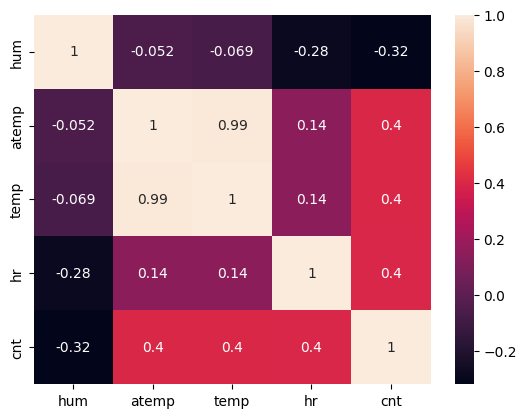

In [142]:
sns.heatmap(df_corr, annot= True)
plt.show()

Dari korelasi diatas, kita dapat melihat beberapa hal sebagai berikut:
1. temp, atemp, dan hr memiliki korelasi positif paling tinggi terhadap cnt
2. hum memiliki korelasi negatif paling rendah terhadap cnt
3. temp dan atemp memiliki korelasi yang positif paling tinggi terhadap satu sama lainnya. temperature adalah skala suhu yang bisa diukur, sementara atemp atau apparent temperatur adalah suhu yang lebih kompleks melibatkan kelembaban udara dankecepatan angin. karena kelembaban udara sudah diwakilkan oleh kolom hum, maka kita akan menghapus kolom temp.

In [143]:
df_copy = df_copy.drop('atemp', axis = 1)

In [144]:
df_corr = df_copy[['hum','temp', 'hr', 'cnt']].corr()
df_corr

,hum,temp,hr,cnt
hum,1.000000,-0.068842,-0.279156,-0.319227
temp,-0.068842,1.000000,0.143867,0.401149
hr,-0.279156,0.143867,1.000000,0.395179
cnt,-0.319227,0.401149,0.395179,1.000000


<Axes: >

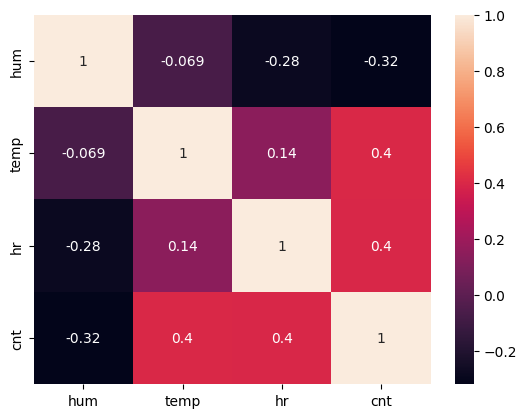

In [145]:
sns.heatmap(df_corr, annot= True)

Sekarang kita bisa melihat korelasi antara kolom hum, temp, dan hr terhadap cnt.

Outliers

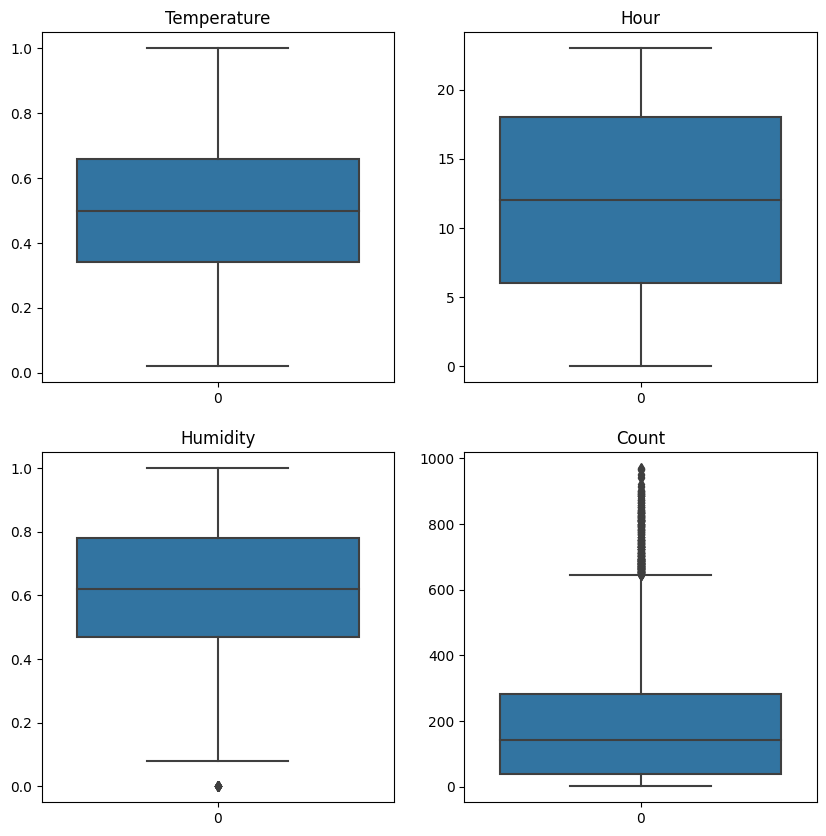

In [146]:
fig, axes = plt.subplots(2,2, figsize=(10, 10))
sns.boxplot(df_copy['temp'], ax = axes[0,0])
sns.boxplot(df_copy['hr'], ax = axes[0,1])
sns.boxplot(df_copy['hum'], ax = axes[1,0])
sns.boxplot(df_copy['cnt'], ax = axes[1,1])

axes[0,0].set_title('Temperature')
axes[0,1].set_title('Hour')
axes[1,0].set_title('Humidity')
axes[1,1].set_title('Count')
plt.show()

Dari visualisasi outliers diatas, kita dapat melihat bahwa tidak ada outliers pada kolom hour dan temperature. kemudian kita dapat melihat ada sedikit outliers pada humidity dan ada banyak pada count.

Berdasarkan pengetahuan umum, udara tidak dapat memiliki tingkat kelembaban 0% karena itu artinya tidak ada partikel air di udara. oleh karena itu kita akan menghapus baris yang memiliki nilai 0 pada kolom humidity.

Pada kolom count terdapat banyak outliers yang jika dihapus akan mempengaruhi data secara signifikan. oleh karena itu, kita tidak akan menghapus outliers pada kolom count.

In [147]:
#menghapus outliers pada kolom hum
df_copy = df_copy.drop(df[df['hum'] == 0].index)

In [148]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12151 entries, 0 to 12164
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12151 non-null  object 
 1   hum         12151 non-null  float64
 2   weathersit  12151 non-null  int64  
 3   holiday     12151 non-null  int64  
 4   season      12151 non-null  int64  
 5   temp        12151 non-null  float64
 6   hr          12151 non-null  int64  
 7   casual      12151 non-null  int64  
 8   registered  12151 non-null  int64  
 9   cnt         12151 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.0+ MB


pada kolom dteday berisi data type berupa object. kita akan merubah data type tersebut menjadi datetime dan akan membuat kolom baru (bulan dan tahun) sesuai data pada kolom dteday.

In [149]:
#merubah dtype object menjadi datetime
df_copy['dteday']= pd.to_datetime(df_copy['dteday'])
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12151 entries, 0 to 12164
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      12151 non-null  datetime64[ns]
 1   hum         12151 non-null  float64       
 2   weathersit  12151 non-null  int64         
 3   holiday     12151 non-null  int64         
 4   season      12151 non-null  int64         
 5   temp        12151 non-null  float64       
 6   hr          12151 non-null  int64         
 7   casual      12151 non-null  int64         
 8   registered  12151 non-null  int64         
 9   cnt         12151 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(7)
memory usage: 1.0 MB


In [150]:
df_copy

,dteday,hum,weathersit,holiday,season,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.76,18,99,758,857
...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,0.75,1,0,1,0.24,7,14,243,257
12161,2012-07-06,0.62,1,0,3,0.78,0,39,63,102
12162,2012-02-20,0.60,2,1,1,0.24,5,0,6,6
12163,2012-03-31,0.77,2,0,2,0.42,2,14,55,69


dtype pada kolom dteday sudah berubah dari yang sebelumnya object menjadi datetime

In [151]:
#membuat kolom baru month dan year
df_copy['year'] = pd.to_datetime(df_copy['dteday']).dt.year
df_copy['year'] = df_copy['year'].astype('category')

df_copy['month'] = pd.to_datetime(df_copy['dteday']).dt.month
df_copy['month'] = df_copy['month'].astype('category')

df_copy['day'] = pd.to_datetime(df_copy['dteday']).dt.day_name()

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12151 entries, 0 to 12164
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      12151 non-null  datetime64[ns]
 1   hum         12151 non-null  float64       
 2   weathersit  12151 non-null  int64         
 3   holiday     12151 non-null  int64         
 4   season      12151 non-null  int64         
 5   temp        12151 non-null  float64       
 6   hr          12151 non-null  int64         
 7   casual      12151 non-null  int64         
 8   registered  12151 non-null  int64         
 9   cnt         12151 non-null  int64         
 10  year        12151 non-null  category      
 11  month       12151 non-null  category      
 12  day         12151 non-null  object        
dtypes: category(2), datetime64[ns](1), float64(2), int64(7), object(1)
memory usage: 1.1+ MB


Sekarang sudah ada kolom baru yaitu year month dan day yang mana kolom year dan month berisikan data type category dan kolom day berisikan data type object

In [152]:
df_copy

,dteday,hum,weathersit,holiday,season,temp,hr,casual,registered,cnt,year,month,day
0,2011-12-09,0.62,1,0,4,0.36,16,24,226,250,2011,12,Friday
1,2012-06-17,0.64,1,0,2,0.54,4,2,16,18,2012,6,Sunday
2,2011-06-15,0.53,1,0,2,0.62,23,17,90,107,2011,6,Wednesday
3,2012-03-31,0.87,2,0,2,0.36,8,19,126,145,2012,3,Saturday
4,2012-07-31,0.55,1,0,3,0.76,18,99,758,857,2012,7,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,0.75,1,0,1,0.24,7,14,243,257,2012,1,Wednesday
12161,2012-07-06,0.62,1,0,3,0.78,0,39,63,102,2012,7,Friday
12162,2012-02-20,0.60,2,1,1,0.24,5,0,6,6,2012,2,Monday
12163,2012-03-31,0.77,2,0,2,0.42,2,14,55,69,2012,3,Saturday


Karena sudah memiliki kolom year, month dan day, maka kita akan menghapus kolom dteday.

Selain itu, kita juga akan menghapus kolom registered dan casual karena keduanya dapat diwakilkan secara total oleh kolom cnt.

In [153]:
df_copy.drop(columns = ['registered','casual', 'dteday'], inplace = True)
df_copy

,hum,weathersit,holiday,season,temp,hr,cnt,year,month,day
0,0.62,1,0,4,0.36,16,250,2011,12,Friday
1,0.64,1,0,2,0.54,4,18,2012,6,Sunday
2,0.53,1,0,2,0.62,23,107,2011,6,Wednesday
3,0.87,2,0,2,0.36,8,145,2012,3,Saturday
4,0.55,1,0,3,0.76,18,857,2012,7,Tuesday
...,...,...,...,...,...,...,...,...,...,...
12160,0.75,1,0,1,0.24,7,257,2012,1,Wednesday
12161,0.62,1,0,3,0.78,0,102,2012,7,Friday
12162,0.60,2,1,1,0.24,5,6,2012,2,Monday
12163,0.77,2,0,2,0.42,2,69,2012,3,Saturday


In [154]:
#membuat data kolom menjadi kategori

df_copy['season'] = df_copy['season'].astype('category')
df_copy['weathersit'] = df_copy['weathersit'].astype('category')
df_copy['holiday'] = df_copy['holiday'].astype('category')

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12151 entries, 0 to 12164
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   hum         12151 non-null  float64 
 1   weathersit  12151 non-null  category
 2   holiday     12151 non-null  category
 3   season      12151 non-null  category
 4   temp        12151 non-null  float64 
 5   hr          12151 non-null  int64   
 6   cnt         12151 non-null  int64   
 7   year        12151 non-null  category
 8   month       12151 non-null  category
 9   day         12151 non-null  object  
dtypes: category(5), float64(2), int64(2), object(1)
memory usage: 629.9+ KB


In [155]:
df_copy.head()

,hum,weathersit,holiday,season,temp,hr,cnt,year,month,day
0,0.62,1,0,4,0.36,16,250,2011,12,Friday
1,0.64,1,0,2,0.54,4,18,2012,6,Sunday
2,0.53,1,0,2,0.62,23,107,2011,6,Wednesday
3,0.87,2,0,2,0.36,8,145,2012,3,Saturday
4,0.55,1,0,3,0.76,18,857,2012,7,Tuesday


Nama kolom masih dalam bentuk singkatan dan atau istilah yang sulit dipahami. Oleh karena itu, kita akan mengganti nama kolom menjadi nama yang mudah dipahami

In [156]:
df_copy.rename(columns={'hum': 'humidity', 'temp' : 'temperature','hr': 'hour', 'weathersit': 'weather', 'cnt': 'count'}, inplace=True)
df_copy.head()

,humidity,weather,holiday,season,temperature,hour,count,year,month,day
0,0.62,1,0,4,0.36,16,250,2011,12,Friday
1,0.64,1,0,2,0.54,4,18,2012,6,Sunday
2,0.53,1,0,2,0.62,23,107,2011,6,Wednesday
3,0.87,2,0,2,0.36,8,145,2012,3,Saturday
4,0.55,1,0,3,0.76,18,857,2012,7,Tuesday


<Axes: xlabel='year', ylabel='count'>

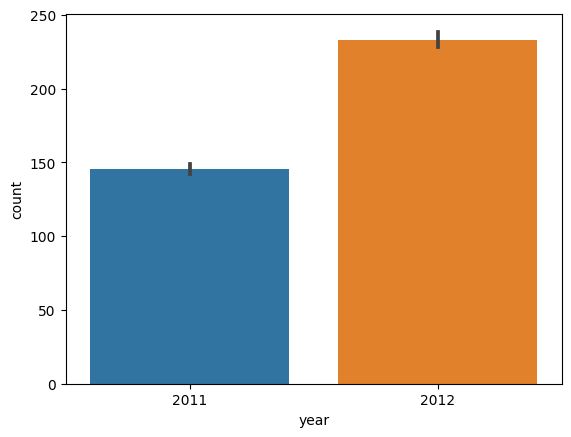

In [157]:
sns.barplot(data= df_copy ,x='year',y='count')

Terjadi peningkatan jumlah pengguna sepeda dari tahun 2011 ke tahun 2012

<Axes: xlabel='month', ylabel='count'>

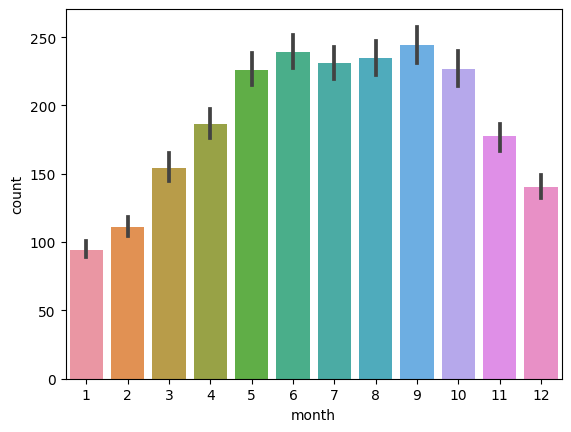

In [158]:
sns.barplot(data= df_copy,x='month',y='count')

Dari grafik ini kita dapat melihat trend pengguna berdasarkan bulan. Dimana terjadi peningkatan pengguna mulai dari bulan januari hingga juni dan terjadi penurunan pengguna mulai dari september hingga desember.

Text(0.5, 1.0, 'Relation Between Humidity and Count')

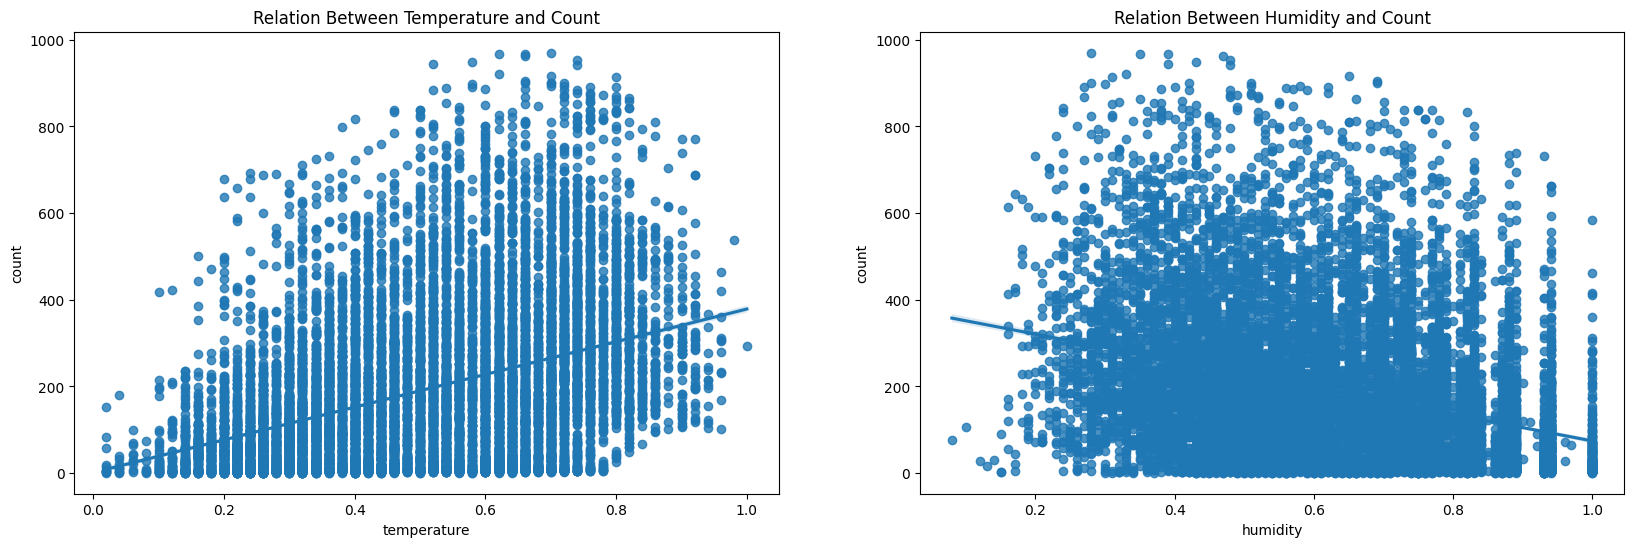

In [159]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize = (20,6))
sns.regplot(x = df_copy['temperature'], y = df_copy['count'], ax = ax1)
ax1.set_title('Relation Between Temperature and Count')
sns.regplot(x = df_copy['humidity'], y = df_copy['count'], ax = ax2)
ax2.set_title('Relation Between Humidity and Count')

kita juga dapat melihat relasi antara temperature dan humidity terhadap count.

1. Pada relasi antara temperature dan count, semakin tinggi temperature, count cenderung meningkat.

2. Pada relasi antara humidity dan count, semakin tinggi humidity, count cenderung menurun

In [160]:
df_copy

,humidity,weather,holiday,season,temperature,hour,count,year,month,day
0,0.62,1,0,4,0.36,16,250,2011,12,Friday
1,0.64,1,0,2,0.54,4,18,2012,6,Sunday
2,0.53,1,0,2,0.62,23,107,2011,6,Wednesday
3,0.87,2,0,2,0.36,8,145,2012,3,Saturday
4,0.55,1,0,3,0.76,18,857,2012,7,Tuesday
...,...,...,...,...,...,...,...,...,...,...
12160,0.75,1,0,1,0.24,7,257,2012,1,Wednesday
12161,0.62,1,0,3,0.78,0,102,2012,7,Friday
12162,0.60,2,1,1,0.24,5,6,2012,2,Monday
12163,0.77,2,0,2,0.42,2,69,2012,3,Saturday


In [161]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12151 entries, 0 to 12164
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   humidity     12151 non-null  float64 
 1   weather      12151 non-null  category
 2   holiday      12151 non-null  category
 3   season       12151 non-null  category
 4   temperature  12151 non-null  float64 
 5   hour         12151 non-null  int64   
 6   count        12151 non-null  int64   
 7   year         12151 non-null  category
 8   month        12151 non-null  category
 9   day          12151 non-null  object  
dtypes: category(5), float64(2), int64(2), object(1)
memory usage: 629.9+ KB


Sekarang kita sudah memiliki dataset yang siap untuk dilakukan modelling dengan detail sebagai berikut:

1. memiliki 10 kolom dan 12151 baris
3. dataset ini tidak memiliki nan atau baris yang kosong

# Modeling

Sebelum melakukan proses modelling, kita akan menggunakan library yang akan dibutuhkan sebagai berikut.

In [162]:
#Library
!pip install category_encoders
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from scipy.stats import randint, uniform

from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


encoding

In [229]:
transformer = ColumnTransformer([
    ('Ordinal', OrdinalEncoder(), ['weather']),
    ('Binary', ce.BinaryEncoder(), ['day'])
], remainder='passthrough')

Kita melakukan proses encoding untuk merubah data kategorikal string maupun integer menjadi boolean yang akan disebarkan menjadi kolom atau parameter baru

data split

In [230]:
X = df_copy.drop('count', axis = 1)
y = df_copy['count']

Selanjutnya, kita melakukan proses data splitting untuk memisahkan independen variabel dengan dependen variabel

train and test split

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

Selanjutnya adalah proses data train dan data test split dengan test size = 30%

In [232]:
# Menentukan algoritma yang akan digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=5)
rf = RandomForestRegressor(random_state=5)
gb = GradientBoostingRegressor(random_state=5)
xgb = XGBRegressor(random_state=5)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_gb = TransformedTargetRegressor(gb, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_gb, log_xgb]

mean_mape = []
std_mape = []

mean_mae = []
std_mae = []

mean_rmse = []
std_rmse = []

# Mencari algoritma terbaik pada tiap metric
for i in models:
    
    crossval = KFold(n_splits=3, shuffle=True, random_state=5)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', i)
    ])
    
    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    mean_mape.append(model_cv_mape.mean())
    std_mape.append(model_cv_mape.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    mean_mae.append(model_cv_mae.mean())
    std_mae.append(model_cv_mae.std())

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )
    
    print(model_cv_rmse, i)

    mean_rmse.append(model_cv_rmse.mean())
    std_rmse.append(model_cv_rmse.std())

[-1.40471983 -1.53065988 -1.3538169 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-111.07571087 -107.62068452 -110.97018248] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-167.23886057 -161.93966058 -168.2661527 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.44547636 -0.42360786 -0.4433543 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-44.18101868 -43.36432142 -45.97113313] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-70.28879769 -70.44305079 -74.78291919] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
             

In [233]:
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'Gradient Boosting', 'XGBoost Regressor'],
    'Mean MAPE': mean_mape,
    'Std MAPE': std_mape,
    'Mean MAE': mean_mae,
    'Std MAE': std_mae,
    'Mean RMSE': mean_rmse,
    'Std RMSE': std_rmse
})

,Model,Mean MAPE,Std MAPE,Mean MAE,Std MAE,Mean RMSE,Std RMSE
0,Linear Regression,-1.429732,0.074331,-109.888859,1.604420,-165.814891,2.772110
1,KNN Regressor,-0.437480,0.009847,-44.505491,1.088678,-71.838256,2.083143
2,DecisionTree Regressor,-0.436075,0.016534,-44.359258,0.944896,-77.492907,2.815926
3,RandomForest Regressor,-0.318418,0.001652,-33.760310,0.718741,-56.105109,1.043500
4,Gradient Boosting,-0.458794,0.016235,-53.988941,2.752736,-85.141600,3.681566
5,XGBoost Regressor,-0.278297,0.007079,-29.278581,0.757123,-48.150093,1.233093


dari hasil pencarian algoritma terbaik, kita dapat melihat bahwa algoritma XGBoost memiliki performa yang baik berdasarkan skor MAPE, RMSE, dan MAE dari keseluruhan algoritma.

**predict to test set with model**

selanjutnya kita akan melakukan prediksi untuk data test set menggunakan model XGBoost

In [234]:
xgb = TransformedTargetRegressor(XGBRegressor(random_state=5), func=np.log, inverse_func=np.exp)

score_mae = []
score_mape = []
score_rmse = []

estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', xgb)
        ])

estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
score_mae.append(mean_absolute_error(y_test, y_pred))
score_mape.append(mean_absolute_percentage_error(y_test, y_pred))
score_rmse.append(r2_score(y_test, y_pred))

score_before_tuning = pd.DataFrame({'MAPE': score_mape, 'MAE': score_mae, 'RMSE': score_rmse}, index=['XGBoost'])
score_before_tuning

,MAPE,MAE,RMSE
XGBoost,0.256916,28.27267,0.935436


setelah melakukan prediksi pada test set, skor MAPE, MAE, dan RMSE XGBoost dapat dilihat seperti di atas.

hyper parameter tuning

In [235]:
# Kedalaman pohon
max_depth = list(range(1, 100, 1))

# Learning rate
learning_rate =  [i / 100 for i in range(1, 100)]

# Jumlah pohon
n_estimators = randint(10, 101)

hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators
}

xgb = XGBRegressor()

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('model', xgb)
        ])

crossval = KFold(n_splits=3, shuffle=True)
 
# Hyperparameter tuning(GridSearchCV)
random_search_xgb = RandomizedSearchCV(
    estimator_xgb,
    param_distributions=hyperparam_space_xgb,
    n_iter=50,
    cv=crossval, 
    scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
    n_jobs=-1,
    refit='neg_root_mean_squared_error'
)

In [236]:
# Fitting data training untuk mencari parameter terbaik
random_search_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Ordinal',
                                                                               OrdinalEncoder(),
                                                                               ['weather']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['day'])])),
                                             ('model',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           colsample_by...
                                                                 0.29, 0.3, ...],
                                        'model__max_depth': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20, 21,
                                                             22, 23, 24, 25, 26,
                                                             27, 28, 29, 30, ...],
                                        'model__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7efcaa059ea0>},
                   refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [237]:
print('XGBoost')
print('Best_score:', random_search_xgb.best_score_)
print('Best_params:', random_search_xgb.best_params_)

XGBoost
Best_score: -60.56401997217902
Best_params: {'model__learning_rate': 0.37, 'model__max_depth': 9, 'model__n_estimators': 20}


setelah melakukan hyperparameter tuning, kita dapat mengetahui bahwa parameter terbaik dari model XGBoost adalah:

1. model__learning_rate = 0.37
2. model__max_depth = 9
3. model__n_estimators = 20

In [238]:
model = {'XGBoost': XGBRegressor(random_state=5)}

xgb_tuning = random_search_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
rmse_xgb_tuning = r2_score(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'MAPE': mape_xgb_tuning, 'MAE': mae_xgb_tuning, 'RMSE': rmse_xgb_tuning}, index=model.keys())
score_after_tuning

,MAPE,MAE,RMSE
XGBoost,0.347577,29.4638,0.932346


performance comparison

In [239]:
# Hasil evaluasi sebelum dan setelah penyetelan hyperparameter
score_comparison = pd.concat([score_before_tuning, score_after_tuning], keys=['Before Tuning', 'After Tuning'])

score_comparison

,,MAPE,MAE,RMSE
Before Tuning,XGBoost,0.256916,28.27267,0.935436
After Tuning,XGBoost,0.347577,29.46380,0.932346


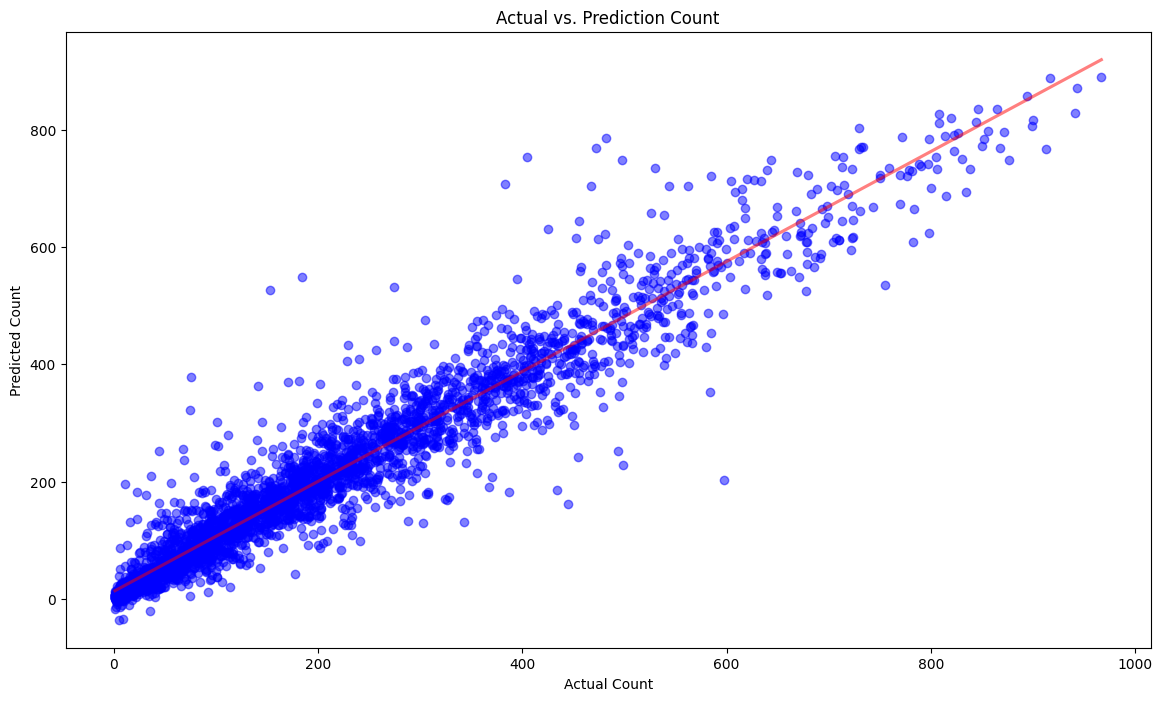

In [240]:
plt.figure(figsize=(14, 8))
sns.regplot(x=y_test, y=y_pred_xgb_tuning, ci=None, scatter_kws = {'color': 'blue', 'alpha': 0.5}, line_kws = {'color': 'red', 'alpha': 0.5}).set(title='Actual vs. Prediction Count', 
                                               xlabel='Actual Count', 
                                               ylabel='Predicted Count')
plt.show()


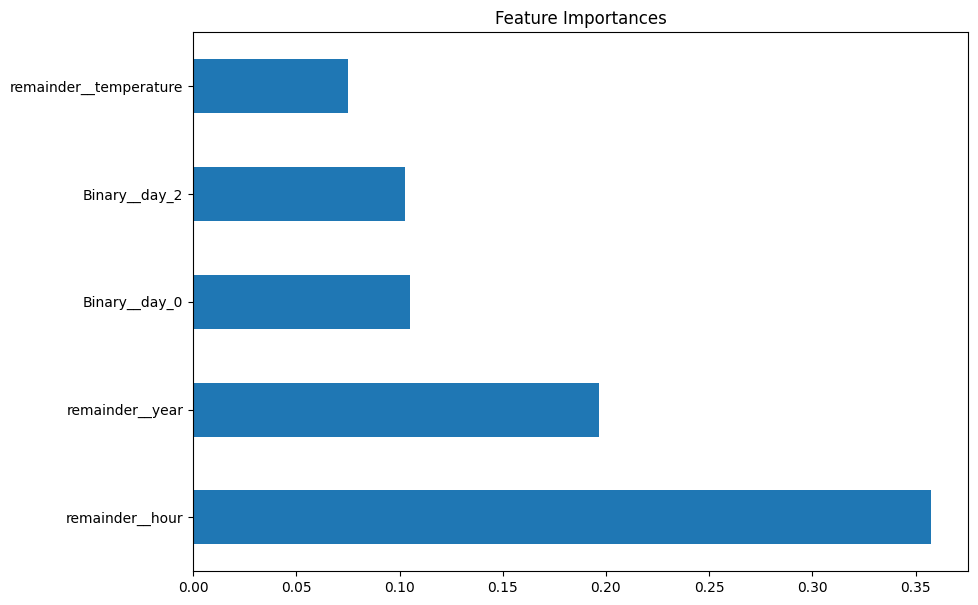

In [241]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False).head()
plt.figure(figsize=(10,7))
feature_imp.plot(kind='barh', title='Feature Importances')
plt.show()

# Conclusion

1.berdasarkan modelling yang sudah dilakukan, kita dapat melihat bahwa fitur 'hour' menjadi yang paling berpengaruh terhadap 'count'

2. metrics evaluasi yang digunakan adalah nilai MAPE, MAE, dan RMSE dimana jika kita lihat bahwa performa pada nilai MAPE setelah hyper tuning adalah 35% yang bisa kita gunakan sebagai perkiraan jumlah pengguna dimana akan meleset sekitar 35% dari jumlah aslinya.

3. bila dilihat dari grafik actual vs predicted count, tidak terlalu bias antara hasil prediksi dengan jumlah aslinya.

4. model masih dapat diperbaiki lebih baik jika ditambahkan fitur fitur lain agar melengkapi data.

# Recommendation

1. penambahan fitur lain yang memiliki korelasi terhadap jumlah pengguna sangat disarankan. bisa menambahkan fitur seperti kecepatan angin, kepadatan lalu lintas, letak stasiun, dan lain sebagainya.

2. jika fitur-fitur seperti yang telah disebutkan ditambahkan ke dalam dataset, kita juga akan mungkin untuk melakukan analisa terhadap efektifitas masing-masing lokasi stasiun, atau meyiapkan jumlah sepeda pada stasiun-stasiun tertentu agar dapat memenuhi permintaan pengguna sepeda.